<a href="https://colab.research.google.com/github/2303A51680/AIML-2024/blob/main/2303A51680_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install required libraries

In [31]:
!pip install pandas scikit-learn matplotlib seaborn openpyxl xlrd

Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


Load dataset

In [42]:
data=pd.read_csv('/content/Absenteeism_at_work.csv')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


Display basic info

In [43]:
print("Dataset Info:")

Dataset Info:


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

 Display first few rows

In [45]:
print("\nDataset Preview:")


Dataset Preview:


In [46]:
print(data.head())


   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0  

 --- Analysis ---

In [ ]:
1. Top 5 reasons for absenteeism

In [47]:
top_reasons = data['Reason for absence'].value_counts().head(5)

In [48]:
print("\nTop 5 Reasons for Absenteeism:")


Top 5 Reasons for Absenteeism:


In [49]:
print(top_reasons)

Reason for absence
23    149
28    112
27     69
13     55
0      43
Name: count, dtype: int64


 2. Day of the week with most absenteeism

In [50]:
most_absent_day = data['Day of the week'].value_counts()

In [51]:
print("\nDay with Most Absenteeism:")


Day with Most Absenteeism:


In [52]:
print(most_absent_day)

Day of the week
2    161
4    156
3    154
6    144
5    125
Name: count, dtype: int64


3. Minimum and maximum age

In [53]:
min_age = data['Age'].min()

In [54]:
max_age = data['Age'].max()

In [55]:
print("\nAge Range of Employees:")


Age Range of Employees:


In [57]:
print(f"Minimum Age: {min_age}, Maximum Age: {max_age}")

Minimum Age: 27, Maximum Age: 58


4. Seasons with most absenteeism

In [58]:
season_absenteeism = data['Seasons'].value_counts()

In [59]:
print("\nSeasons with Most Absenteeism:")


Seasons with Most Absenteeism:


In [60]:
print(season_absenteeism)

Seasons
4    195
2    192
3    183
1    170
Name: count, dtype: int64


5. Highest educational qualification

For clustering, we use a subset of numerical data

In [61]:
clustering_data = data[['Distance from Residence to Work', 'Age', 'Service time']].dropna()

Normalize the data
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
clustering_data_scaled = scaler.fit_transform(clustering_data)

Apply K-Means clustering

In [64]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [65]:
clusters = kmeans.fit_predict(clustering_data_scaled)


 Add cluster labels to the dataset
clustering_data['Cluster'] = clusters

Visualize clusters

In [68]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [70]:
sns.scatterplot

<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

In [73]:
( x=clustering_data['Distance from Residence to Work'],

In [75]:

    y=clustering_data['Age'],

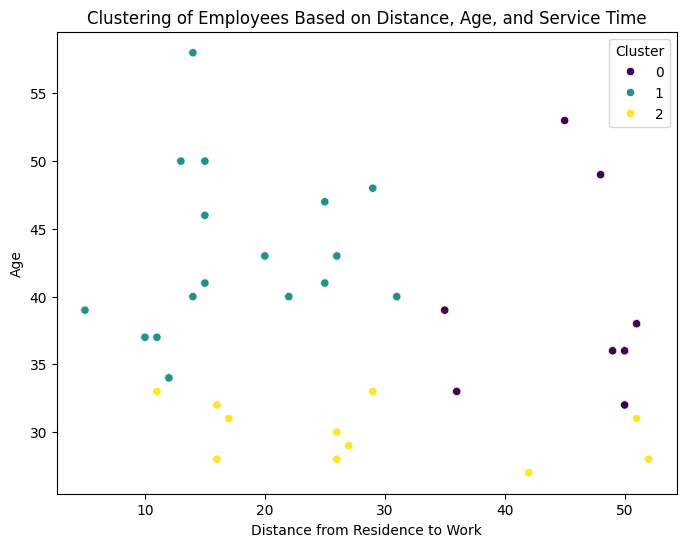

In [91]:

clustering_data['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_data['Distance from Residence to Work'],
    y=clustering_data['Age'],
    hue=clustering_data['Cluster'],
    palette='viridis'
)
plt.title('Clustering of Employees Based on Distance, Age, and Service Time')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

In [92]:
processed_file = "Processed_Absenteeism_Data.csv"
clustering_data.to_csv(processed_file, index=False)
print(f"\nProcessed data saved as {processed_file}")


Processed data saved as Processed_Absenteeism_Data.csv
